# Student Mental Health Analysis

The primary aim of this project is to conduct a comprehensive analysis of student mental health using a dataset containing information about gender, age, academic details, CGPA, marital status and responses to questions related to depression, anxiety, panic attacks, and seeking specialist treatment. The project seeks to explore and understand patterns, correlations, and factors influencing mental health among students.

## Import the necceasary Libraries and Dataset

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('Student Mental Health.csv')

### Check the head and info od the Dataset

In [249]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


The info and the data view above shows that the dataset is clean and ready for analysis

In [250]:
df.shape

(101, 11)

This shows that we have 101 rows and 11 columns in the dataset 

## Exploratory Data Analysis

In [8]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


Age is the only column with numerical value, the mean age is 20.5, minimum age is 18years and the maximum age is 24 years

### Gender Disparities in Mental Health

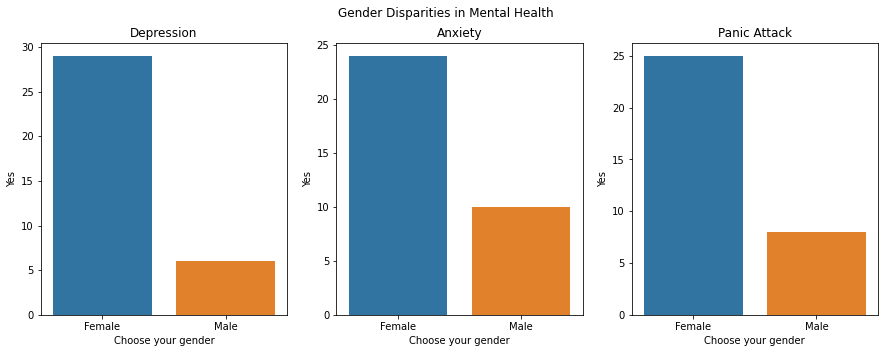

In [66]:
# Group by gender and calculate the percentage of 'Yes' responses for each mental health issue
gender_disparities1 = df.groupby('Choose your gender')['Do you have Depression?'].value_counts().unstack()
gender_disparities2 = df.groupby('Choose your gender')['Do you have Anxiety?'].value_counts().unstack()
gender_disparities3 = df.groupby('Choose your gender')['Do you have Panic attack?'].value_counts().unstack() 
    
# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Gender Disparities in Mental Health')

# Plot for each mental health issue
sns.barplot(x=gender_disparities1.index, y=gender_disparities1['Yes'], ax=axes[0])
axes[0].set_title('Depression')

sns.barplot(x=gender_disparities2.index, y=gender_disparities2['Yes'], ax=axes[1])
axes[1].set_title('Anxiety')

sns.barplot(x=gender_disparities3.index, y=gender_disparities3['Yes'], ax=axes[2])
axes[2].set_title('Panic Attack')

plt.show()


__Depression:__  29 people who choose their gender as female reported experiencing depression, while 6 people who choose their gender as male reported experiencing depression. The percentage of people who choose their gender as female who reported experiencing depression is higher than the percentage of people who choose their gender as male.

__Anxiety:__ 24 people who choose their gender as female reported experiencing anxiety, while 10 people who choose their gender as male reported experiencing anxiety. The percentage of people who choose their gender as female who reported experiencing anxiety is higher than the percentage of people who choose their gender as male.

__Panic attacks:__  25 people who choose their gender as female reported experiencing panic attacks, while 8 of people who choose their gender as male reported experiencing panic attacks. The percentage of people who choose their gender as female who reported experiencing panic attacks is higher than the percentage of people who choose their gender as male.

In conclusion, the chart suggests a potential trend of slightly higher prevalence of depression, anxiety, and panic attacks among females compared to males

## Age and Mental Health

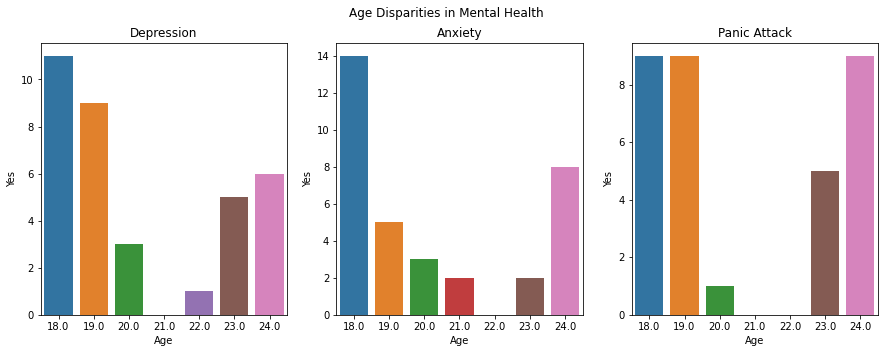

In [72]:
# Group by gender and calculate the percentage of 'Yes' responses for each mental health issue
Age_disparities1 = df.groupby('Age')['Do you have Depression?'].value_counts().unstack()
Age_disparities2 = df.groupby('Age')['Do you have Anxiety?'].value_counts().unstack()
Age_disparities3 = df.groupby('Age')['Do you have Panic attack?'].value_counts().unstack() 
    
# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Age Disparities in Mental Health')

# Plot for each mental health issue
sns.barplot(x=Age_disparities1.index, y=Age_disparities1['Yes'], ax=axes[0])
axes[0].set_title('Depression')

sns.barplot(x=Age_disparities2.index, y=Age_disparities2['Yes'], ax=axes[1])
axes[1].set_title('Anxiety')

sns.barplot(x=Age_disparities3.index, y=Age_disparities3['Yes'], ax=axes[2])
axes[2].set_title('Panic Attack')

plt.show()

The Depression chart shows a relatively steady prevalence of depression across the age range, with a slight upwards trend from ages 18 to 21, followed by a slight dip and then remaining fairly constant until age 24. This suggests that depression is relatively common among young adults in this age group, with no significant variation based on age.

The Anxiety chart shows a similar pattern to the Depression chart, with a slightly increasing trend in "Yes" responses from ages 18 to 21. However, unlike Depression, it then shows a more pronounced decline from ages 21 to 24. This suggests that anxiety, while also common among young adults, may be slightly more prevalent in the early twenties but potentially decrease as individuals move towards mid-twenties.


The Panic Attack chart shows a different pattern compared to Depression and Anxiety. It starts with a relatively higher prevalence at age 18 and 19, then shows a sharp decline until age 20, followed by a more gradual increase until age 24. This suggests that panic attacks may be more common among individuals as young as 18 but become less frequent as they move into their early twenties.

### Course and Mental Health

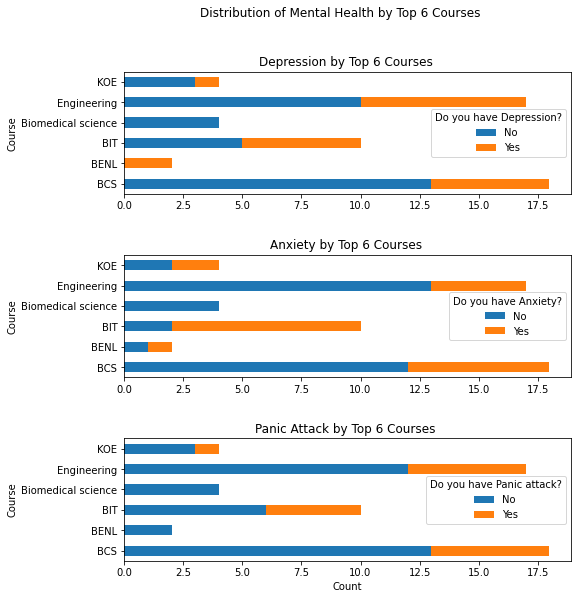

In [125]:
# Get the top 6 academic courses with the highest counts of mental health issues
top_courses = df['What is your course?'].value_counts().nlargest(6).index

# Filter the data for the top courses
filtered_data = df[df['What is your course?'].isin(top_courses)]

# Count the occurrences of depression for each course
depression_counts = filtered_data.groupby(['What is your course?', 'Do you have Depression?']).size().unstack()
anxiety_counts = filtered_data.groupby(['What is your course?', 'Do you have Anxiety?']).size().unstack()
panic_counts = filtered_data.groupby(['What is your course?', 'Do you have Panic attack?']).size().unstack()

# Plot a horizontal bar plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 9),gridspec_kw={'hspace': 0.5})
fig.suptitle('Distribution of Mental Health by Top 6 Courses')
depression_counts.plot(kind='barh',xlabel ='Course' ,stacked=True, ax=axes[0],title ='Depression by Top 6 Courses ')
anxiety_counts.plot(kind='barh', xlabel ='Course', stacked=True, ax=axes[1],title ='Anxiety by Top 6 Courses ')
panic_counts.plot(kind='barh', xlabel ='Course',stacked=True, ax=axes[2],title ='Panic Attack by Top 6 Courses ')

 

## CGPA and Mental Health


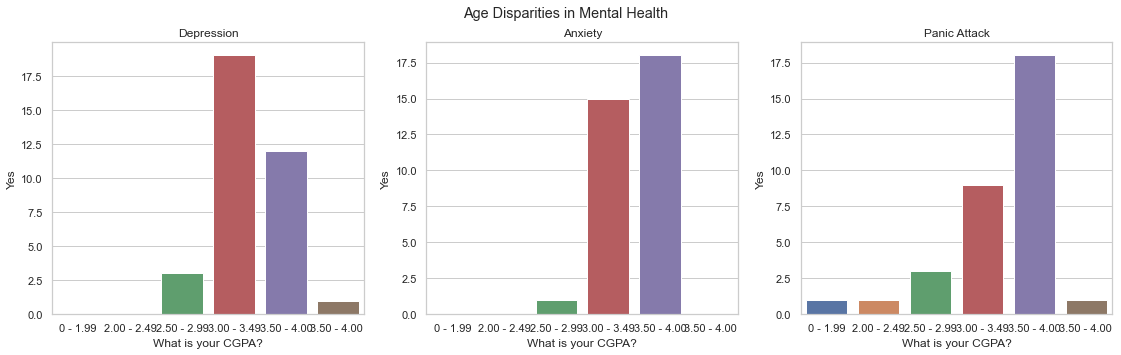

In [222]:
cgpa_variable = df["What is your CGPA?"] 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 5))
fig.suptitle('Age Disparities in Mental Health')
# Show the plot


cgpa_disparities1 = df.groupby("What is your CGPA?")['Do you have Depression?'].value_counts().unstack()
cgpa_disparities2 = df.groupby("What is your CGPA?")['Do you have Anxiety?'].value_counts().unstack()
cgpa_disparities3 = df.groupby("What is your CGPA?")['Do you have Panic attack?'].value_counts().unstack() 
    

sns.barplot(x=cgpa_disparities1.index, y=cgpa_disparities1['Yes'], ax=axes[0])
axes[0].set_title('Depression')
sns.barplot(x=cgpa_disparities2.index, y=cgpa_disparities2['Yes'], ax=axes[1])
axes[1].set_title('Anxiety')

sns.barplot(x=cgpa_disparities3.index, y=cgpa_disparities3['Yes'], ax=axes[2])
axes[2].set_title('Panic Attack')

plt.show()

Student with 3.00-3.49 CGPA has depression than other CGPA  while student with 3.50-4.00 CGPA has anxiety and panic attack 

## Prevalence of Mental Health Issues

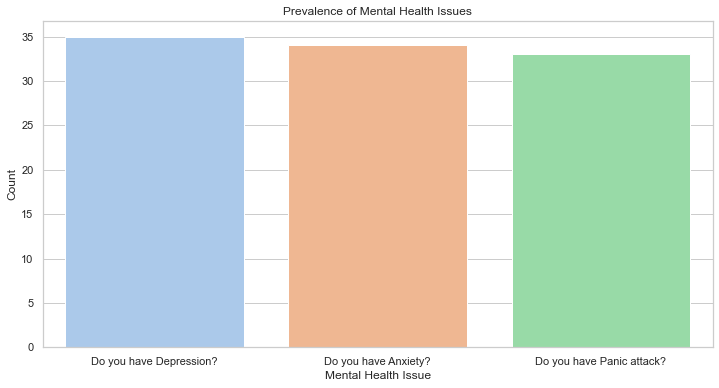

In [169]:
 prevalence_counts = df[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].apply(pd.value_counts)

# Set Seaborn style
sns.set(style="whitegrid")

# Bar chart for the prevalence of mental health issues
plt.figure(figsize=(12, 6))
sns.barplot(x=prevalence_counts.index, y='Yes', data=prevalence_counts, palette='pastel')

plt.title('Prevalence of Mental Health Issues')
plt.xlabel('Mental Health Issue')
plt.ylabel('Count')

plt.show()

## Gender-Based Differences in Seeking Treatment

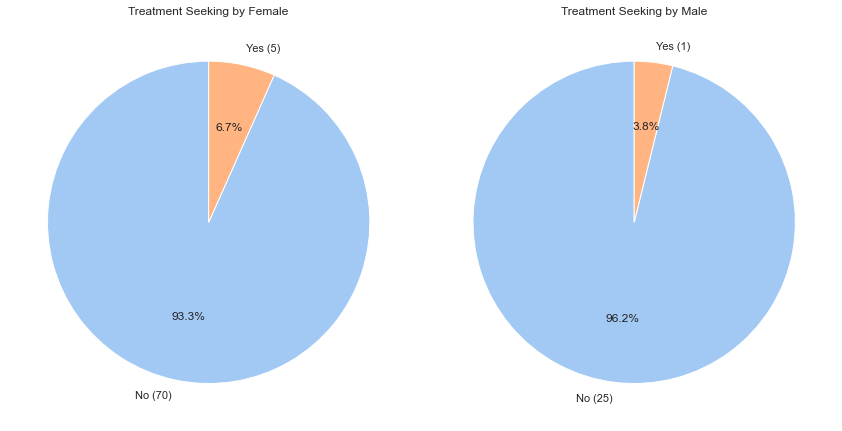

In [229]:
treatment_counts = df.groupby(['Choose your gender', 'Did you seek any specialist for a treatment?']).size().unstack()

 

plt.figure(figsize=(12, 6))

# Iterate through each gender
for i, gender in enumerate(['Female', 'Male']):
    plt.subplot(1, 2, i + 1)

    sizes = treatment_counts.loc[gender].values
    labels = [f'{label} ({size})' for label, size in zip(['No', 'Yes'], sizes)]
    colors = sns.color_palette('pastel')[0:2]  # Set colors using Seaborn pastel palette
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Treatment Seeking by {gender}')

plt.tight_layout()
plt.show()

The chart above shows the percentage of male and female base on treatment seeking

## Corelation between Age, gender and menatal health issue

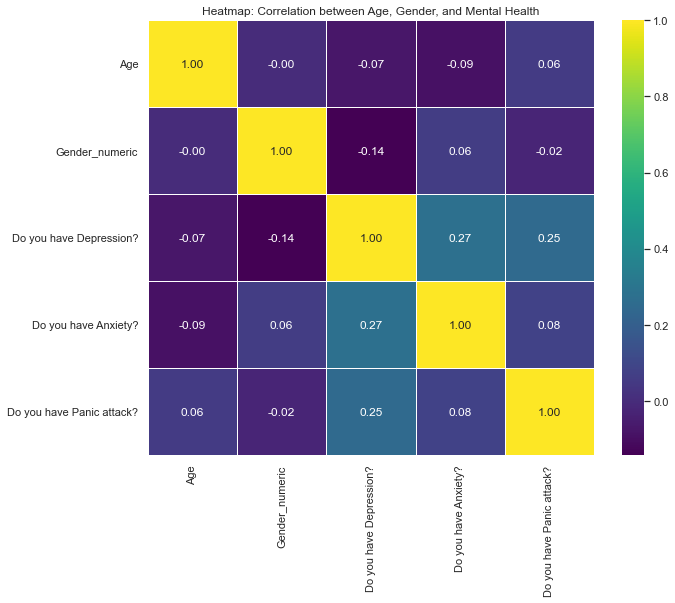

In [ ]:
df['Gender_numeric'] = df['Choose your gender'].map({'Female': 0, 'Male': 1})

# Encode mental health variables as numeric values
mental_health_variables = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
df[mental_health_variables] = df[mental_health_variables].replace({'No': 0, 'Yes': 1})

# Calculate the correlation matrix
correlation_matrix = df[['Age', 'Gender_numeric', *mental_health_variables]].corr()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.title('Heatmap: Correlation between Age, Gender, and Mental Health')
plt.show()
 

A slightly negative correlation between age, gender, and mental health suggests that there may be some relationship where as one variable increases, the other decreases.


__Age and Mental Health:__

A negative correlation between age and mental health might suggest that, on average, as individuals get older, they may experience a decrease in certain mental health issues. This could be due to factors such as increased resilience, coping mechanisms developed over time, or changes in life circumstances.

__Gender and Mental Health:__

A negative correlation between gender and mental health suggests that, on average, there may be differences in mental health between genders. For example, it could indicate that one gender tends to have higher mental health scores than the other. 

## Conclusion

The dataset reveals varying prevalence rates of mental health issues among students, 
with a notable proportion experiencing symptoms of depression, anxiety, and panic attacks.
The analysis suggests negative and neutral correlations between age and mental health variables which implies that as individuals get older, they may experience a decrease in certain mental health issues.